In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.image as mpimg
from skimage.io import imread, imshow

# distributions
from scipy.stats import randint 
from scipy.stats import uniform


# Import Keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.layers import Input

###### Voor Tensorflow-GPU ########

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [34]:
# Datasets

df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X_train = df_train.drop(["label"], axis=1)
y_train = df_train["label"]
X_test = df_test.drop(["label"], axis=1)
y_test = df_test["label"]

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [36]:
df_list = X_train.values.tolist()

In [41]:
input_model = np.reshape(df_list[0], (1,1,28,28))

In [46]:
input_dim = input_model.shape

model = Sequential()
model.add(Conv2D(8, kernel_size=(5,5), strides=(2,2), activation='relu',input_shape=input_dim)) 
model.add(MaxPooling2D(pool_size=(2, 2)))
#    model.add(Dropout(0.3))
#    model.add(BatchNormalization())
model.add(Conv2D(100, (5,5), activation='relu')) 
model.add(MaxPooling2D(pool_size=(3,3)))
#    model.add(Dropout(0.3))
#    model.add(BatchNormalization())

model.add(Flatten()) 
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu')) 

model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_2/Conv2D/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 2, 2, 1], use_cudnn_on_gpu=true](conv2d_2/Conv2D/Reshape, conv2d_2/Conv2D/Conv2D/ReadVariableOp)' with input shapes: [?,1,28,28], [5,5,28,8].

In [ ]:
def create_model(input_dim):
    model = Sequential()
    model.add(Conv2D(8, kernel_size=(5,5), activation='relu',input_shape=input_dim)) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.3))
#     model.add(BatchNormalization())
    model.add(Conv2D(16, (5,5), activation='relu')) 
    model.add(MaxPooling2D(pool_size=(3,3)))
#     model.add(Dropout(0.3))
#     model.add(BatchNormalization())

    model.add(Flatten()) 
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='relu')) 

    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [14]:
activation = 'relu'
dropout_rate = 0.2
kernel_initializer ='uniform'
optimizer = 'adam'
lr = 0.01
batchsize = 32

input_img = Input(shape=(1,1,28,28))

model = Sequential()
model.add(Dense(100, input_dim=input_img, kernel_initializer=kernel_initializer,activation=activation))
model.add(Dropout(dropout_rate))
model.add(Dense(50, kernel_initializer=kernel_initializer,activation=activation))
model.add(Dropout(dropout_rate))
model.add(Dense(50, kernel_initializer=kernel_initializer,activation=activation))
model.add(Dropout(dropout_rate))
model.add(Dense(10, activation = 'softmax')) # 0-9 outputs


model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy']) 
model.summary()

TypeError: Error converting shape to a TensorShape: Dimension value must be integer or None or have an __index__ method, got value '<tf.Tensor 'input_1:0' shape=(None, 1, 1, 28, 28) dtype=float32>' with type '<class 'tensorflow.python.framework.ops.Tensor'>'.

In [5]:
earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('MNIST.h5', verbose=1, save_best_only=True)
history = model.fit(X_train, 
                    y_train, 
                    epochs=50, 
                    callbacks=[earlystopper, checkpointer],
                    validation_split=0.33, 
                    batch_size=batchsize,
                    verbose=1).history

Epoch 1/50
618/629 [============================>.] - ETA: 0s - loss: 0.6652 - accuracy: 0.7978
Epoch 00001: val_loss improved from inf to 0.28008, saving model to MNIST.h5
629/629 [==============================] - 3s 5ms/step - loss: 0.6606 - accuracy: 0.7993 - val_loss: 0.2801 - val_accuracy: 0.9192
Epoch 2/50
616/629 [============================>.] - ETA: 0s - loss: 0.3528 - accuracy: 0.9019
Epoch 00002: val_loss improved from 0.28008 to 0.23110, saving model to MNIST.h5
629/629 [==============================] - 3s 4ms/step - loss: 0.3526 - accuracy: 0.9019 - val_loss: 0.2311 - val_accuracy: 0.9383
Epoch 3/50
615/629 [============================>.] - ETA: 0s - loss: 0.2907 - accuracy: 0.9210
Epoch 00003: val_loss improved from 0.23110 to 0.21743, saving model to MNIST.h5
629/629 [==============================] - 3s 4ms/step - loss: 0.2904 - accuracy: 0.9211 - val_loss: 0.2174 - val_accuracy: 0.9435
Epoch 4/50
617/629 [============================>.] - ETA: 0s - loss: 0.2674 - a

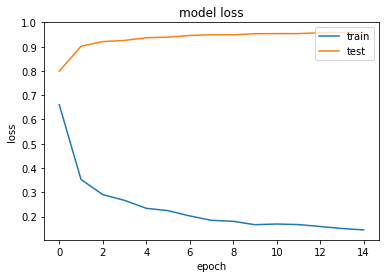

In [6]:
plt.plot(history['loss'])
plt.plot(history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [9]:
print(model.get_layer(index=0).name)
print(model.get_layer(index=-1).name)

dense
dense_3


In [36]:
import tensorflow as tf
import tf2onnx

with tf.Session() as sess:
    x = tf.placeholder(tf.float32, [2, 3], name="input")
    x_ = tf.add(x, x)
    _ = tf.identity(x_, name="output")
    onnx_graph = tf2onnx.tfonnx.process_tf_graph(sess.graph, input_names=["input:0"], output_names=["output:0"])
    model_proto = onnx_graph.make_model("test")
    with open("/tmp/model.onnx", "wb") as f:
        f.write(model_proto.SerializeToString())

AttributeError: module 'tensorflow' has no attribute 'Session'

In [38]:
# let's install the onnx packages from the source
!pip install --quiet -U onnxruntime
!pip install --quiet -U git+https://github.com/microsoft/onnxconverter-common
!pip install --quiet -U git+https://github.com/onnx/keras-onnx

You should consider upgrading via the 'python -m pip install --upgrade pip' command.
  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git clone -q https://github.com/microsoft/onnxconverter-common 'C:\Users\piett\AppData\Local\Temp\pip-req-build-ojem0fbt'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git clone -q https://github.com/onnx/keras-onnx 'C:\Users\piett\AppData\Local\Temp\pip-req-build-s7owwef0'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [7]:
import keras2onnx
print("keras2onnx version is "+keras2onnx.__version__)
# convert to onnx model
onnx_model = keras2onnx.convert_keras(model, 'mnist-onnx', debug_mode=1)
output_model_path = "./mnist-model.onnx"
# and save the model in ONNX format
keras2onnx.save_model(onnx_model, output_model_path)

tf executing eager_mode: True
tf.keras model eager_mode: False
Processing a keras layer - (dense_3: <class 'tensorflow.python.keras.layers.core.Dense'>)
	output: dense_3/Softmax:0
	input : dropout_2/cond/Identity:0
Processing a keras layer - (dropout_2: <class 'tensorflow.python.keras.layers.core.Dropout'>)
	output: dropout_2/cond/Identity:0
	input : dense_2/Relu:0
Processing a keras layer - (dense_2: <class 'tensorflow.python.keras.layers.core.Dense'>)
	output: dense_2/Relu:0
	input : dropout_1/cond/Identity:0
Processing a keras layer - (dropout_1: <class 'tensorflow.python.keras.layers.core.Dropout'>)
	output: dropout_1/cond/Identity:0
	input : dense_1/Relu:0
Processing a keras layer - (dense_1: <class 'tensorflow.python.keras.layers.core.Dense'>)
	output: dense_1/Relu:0
	input : dropout/cond/Identity:0
Processing a keras layer - (dropout: <class 'tensorflow.python.keras.layers.core.Dropout'>)
	output: dropout/cond/Identity:0
	input : dense/Relu:0
Processing a keras layer - (dense: <

keras2onnx version is 1.8.0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)             

Converting the operator (Identity3): Identity
The maximum opset needed by this model is only 9.
